# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

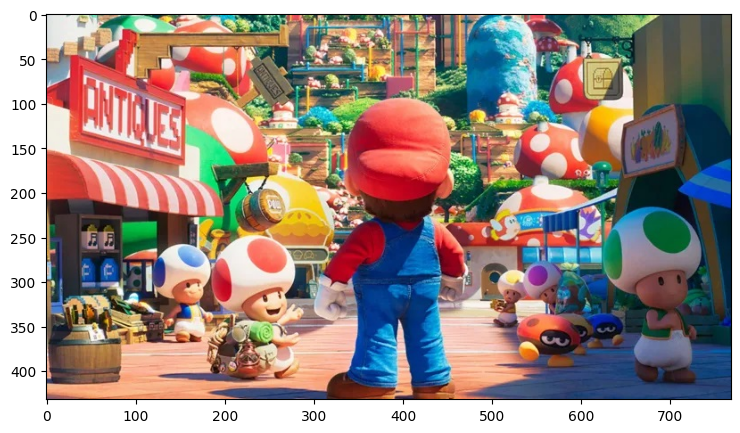

In [28]:
# img = cv2.imread('../data/sea.jpg')
# I use another image because I push it to my own git repo and I don't want to keep original directories structure
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x17ac3ff1af0>)

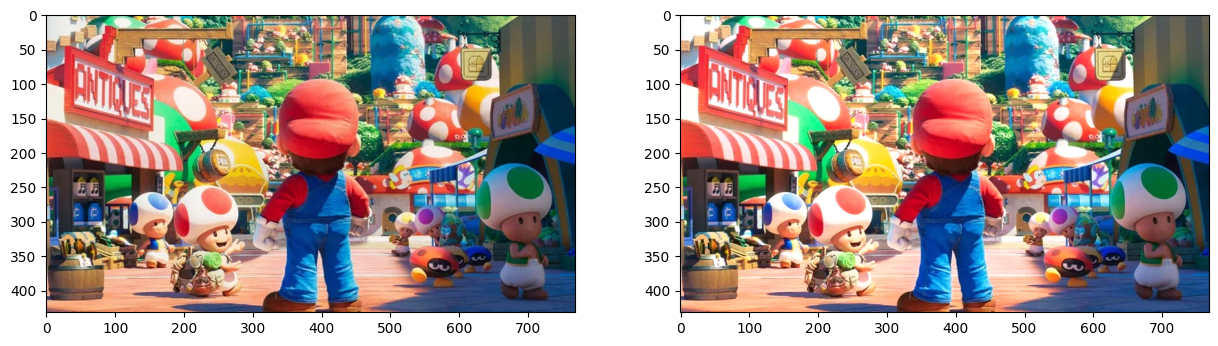

In [29]:
# Define white patch and the coefficients
# row, col = 485, 864 
# Another coordinate of white pixel (probably white pixel)
row, col = 10, 10 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x17ac08af0a0>)

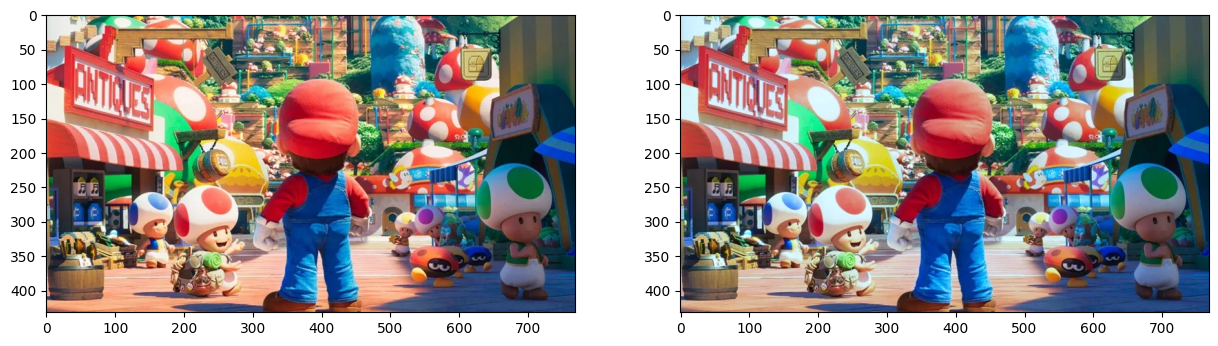

In [30]:
# Load your image
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
red, green, blue, _ = cv2.sumElems(img)
pixelsCount = img.shape[0] * img.shape[1]
mean_r = red / pixelsCount
mean_g = green / pixelsCount
mean_b = blue / pixelsCount

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
mean_gray = (mean_r + mean_g + mean_b) / 3
kr = mean_r / mean_gray
kg = mean_g / mean_gray
kb = mean_b / mean_gray

# Apply color balancing and generate the balanced image
balanced = img.copy()
balanced[:, :, 0] = np.clip(balanced[:, :, 0] / kr, 0, 255)
balanced[:, :, 1] = np.clip(balanced[:, :, 1] / kg, 0, 255)
balanced[:, :, 2] = np.clip(balanced[:, :, 2] / kb, 0, 255)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x17ac2fcf850>)

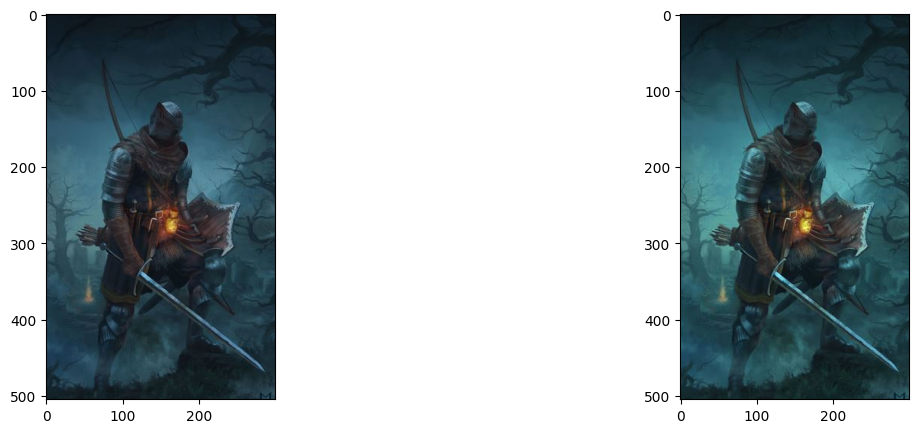

In [31]:
# Load your image
# first image doesn't fit because it contains 255 value in each channel
img = cv2.imread('img2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
max_r = red.max()
max_g = green.max()
max_b = blue.max()

# Apply scale-by-max balancing and generate the balanced image
balanced = img.copy()
# !!! DO NOT CHANGE ORDER OF MULTIPLIERS. * 255 / max_r leads to overflow of uint8 
balanced[:, :, 0] = balanced[:, :, 0] / max_r * 255
balanced[:, :, 1] = balanced[:, :, 1] / max_g * 255
balanced[:, :, 2] = balanced[:, :, 2] / max_b * 255

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)